#Predictive data analysis - a.k.a. models 101

##What do we mean when we talk about models?  
At their most basic, models are means of predicting or estimating what will/would happen without it actually happening. A more nuanced view of statistical models is that they help up understand relationships that are not readily apparant. 

We will denote denote models by stating "given information $X$, what can we say about $Y$"? 

For example
* Given the time spent driving ($X$), how far have we traveled ($Y$)?
* Given that I reduce my morning shower by 5min, how much energy will I save?
* Given the price of an item and its brand name, will a customer purchase it?
* Given a student's demograpic "profile", what major will they choose?
* Given the amount of time spent studying for Physics 1A, what grade will a student get?
* Given the aveage grade of a major's introductory course, how many students will leave the major?
* Given that a student does well in a Physics course, how do we expect them to perform in a Gender Studies course?

<span style="color:red; font-size:1.5em;">
Please think up other models that may be relevent to your project ideas and include them below.
</span>

* Given ...

## Describing Data 
Discuss the differences between the models described above. 

### Variable types
* **Continuous**:  May take an infinite number of numerical values (when bounded). 
* **Discrete**:    May take only a countable number of numerical values.
* **Logical**:     May take only two values, true or false.
* **Categorical**: May take a finite number of labeled values with no specific order or numerical separation from eachother. 

<span style="color:red; font-size:1.5em;">
Please give three examples of each type of data below.
</span>

* **Continuous**: 
* **Discrete**:    
* **Logical**:    
* **Categorical**: 

##  Describing Models

### Probablistic versus Deterministic models
**Deterministic models** predict a definite outcome. E.g., "If you drive for one hour at a speed of 60 miles per hour, you will have traveled __ miles". 

**Probabilistic models** give tell you the likelihood of an outcome. E.g., "If you study for an exam you 50%  likely to get an A, and 40%  to get a B" or "If you do well in a course you are more likely to major in the subject matter"

#### What is a statistic?
sta·tis·tic (stəˈtistik)

noun: a fact or piece of data from a study of a large quantity of numerical data.
e.g., the mean or standard deviation of a set of data. 


### Statistical Models
If we have observations of variables, data, and we estiamte relationships between the variables using the data, we call the resulting model a "statistical model" 

This is because the realtionships between data are defined by **parameters** that are fit using statistics. 

### Supervised versus unsupervised models
Most models are supervised,  they are models for which we observe the outcome variable $Y$.  In unsupervised models we do not observe $Y$. In this case a modeler may look for patterns in $X$ that could be related to theier desired outcome, $Y$.  Though it is difficult or impossible to proove that they relate to this outcome.  

# Importing grade distribution data

### We are loading  data from courses taught in L&S during the spring of 2013
This is a lot of code to import data on grade distributions for courses, and to process it into a useful format for us.
I'm inlcuding it because you may find it instructive later but will not be reviewing it today. 

In [247]:
# Packages to import and process data
import os
import numpy as np
import pandas as pd 

In [248]:
## Read in a file of grade distributions for the L&S in the spring of 2013.
#  I believe that each row of this file is a set of students in the course who all received the same grade, 
#  the column heading are misleading me-thinks
folder = 'data'
filename = 'GradeDist_2013Sp.csv'
df = pd.read_csv(os.path.join(folder, filename))
df

,﻿Grade Sort Nbr,Enrollment Cnt,% Grades Receivedof Enrollment,Letter Grd Cnt,Course Control Nbr,Instructor Name,Average Grade,Course Subject Short Nm,Course Number,Section Nbr,Grade Subtype Desc,Grade Type Desc,Grade Nm,Course Title Nm
0,1,4,NaN,NaN,527,G. Ugo Nwokeji,4,African American Studies,4B,001,A,Letter Grade,A+,Africa: Hist & Cul
1,1,3,NaN,NaN,539,Brandi Catanese,4,African American Studies,5A,001,A,Letter Grade,A+,Afam Life & Cul U S
2,1,1,NaN,NaN,557,Sam Mchombo,4,African American Studies,10B,001,A,Letter Grade,A+,Intermed Swahili
3,1,2,NaN,NaN,560,Edwin Okongo,4,African American Studies,11B,001,A,Letter Grade,A+,Elementary Swahili
4,1,2,NaN,NaN,563,Edwin Okongo,4,African American Studies,11B,002,A,Letter Grade,A+,Elementary Swahili
5,1,5,NaN,NaN,610,John Patton,4,African American Studies,109,001,A,Letter Grade,A+,Black/Male Am Life
6,1,2,NaN,NaN,626,Hardy Frye,4,African American Studies,122,001,A,Letter Grade,A+,"Afam Family, Am Soc"
7,1,2,NaN,NaN,628,Stephen Small,4,African American Studies,123,001,A,Letter Grade,A+,Social & Political
8,1,1,NaN,NaN,635,Darieck Scott,4,African American Studies,152F,001,A,Letter Grade,A+,Neo-Slave Narrative
9,1,6,NaN,NaN,638,Aya De Leon,4,African American Studies,156AC,001,A,Letter Grade,A+,Poetry 4 People:Int


In [421]:
# Function to process the raw grade data
def proc_grade_dist_data(df):
    # Take only columns we plan on using, 
    df_limited = df[['Course Subject Short Nm', 'Course Number' ,'Enrollment Cnt','Grade Subtype Desc','Grade Nm','Average Grade']]
    df_limited = df_limited.sort(['Course Subject Short Nm','Course Number'])
    # Rename them
    df_limited.columns = ['Subject','Course Number','Student Count','Grade Subtype','Letter Grade','Numerical Grade']
    
    # Sum all of the enrollments from separate sections (CCNs) of the same course
    # Pandas makes this easy, but we have to be careful not to also sum the numerical grade column
    df_grouped = df_limited.groupby(['Subject','Course Number','Letter Grade'])
    df_agg = df_grouped.agg({'Student Count':'sum', 'Numerical Grade':'mean'}).reset_index()
    
    # Find the total number of students in each class and merge as a column in our original data.frame
    df_sum_course = df_agg[['Subject','Course Number','Student Count']].groupby(['Subject','Course Number']).sum().reset_index()
    df_sum_course.columns = ['Subject','Course Number','Total Student Count']

    # Find the fraction of students with each grade in each course
    df_merged = df_agg.merge(df_sum_course)
    df_merged['Frac w Grade'] = df_merged['Student Count'] / df_merged['Total Student Count']

    ### FIND AVERAGE LETTER GRADE
    # Exclude all Pass/Incomplete/NoPass Grades
    df_letter = df_merged.loc[ (df_merged['Numerical Grade'].notnull()) ]

    # Find a new sum of headcounts in each course, only counting those with letter grades
    df_sum_course_letter         = df_letter[['Subject','Course Number','Student Count']].groupby(['Subject','Course Number']).sum().reset_index()
    df_sum_course_letter.columns = ['Subject','Course Number','Total Student Count Letter']

    # Find the fraction of students with each letter grade in each course
    df_letter_merged = df_letter.merge(df_sum_course_letter)
    df_letter_merged['Frac w Letter Grade'] = df_letter_merged['Student Count'] / df_letter_merged['Total Student Count Letter']

    # Find average letter grade in each course
    df_letter_merged['Contrib to Ave Letter'] = df_letter_merged['Frac w Letter Grade'] * df_letter_merged['Numerical Grade']
    df_aveletter = df_letter_merged[['Subject','Course Number','Contrib to Ave Letter']].groupby(['Subject','Course Number']).sum().reset_index()
    df_aveletter.columns = ['Subject','Course Number','Ave Letter Grade']

    ## Merge average letter grade onto the original dataset as a new column. 
    df_merged_2 = df_merged.merge(df_aveletter, 'left')
    
    ## Categories classes as upper div, lower, div, and graduate
    import re
    cn_noletter = [float(re.sub('[^0-9]','',df_merged_2.loc[i]['Course Number'])) for i in list( df_merged_2.index)]

    def get_level(n):
        if n < 100:
            return('Lower Division')
        elif n < 200:
            return('Upper Division')
        elif n > 200:
            return('Graduate')
        else: 
            return('Null')

    df_merged_2['Course Level'] = [get_level(cn_noletter[i]) for i in np.arange(0, len(cn_noletter))]
    df_merged_2
    
    return(df_merged_2)

## Now we can print out the processed data

In [422]:
## Process the raw data
grades2013 = proc_grade_dist_data(df)
grades2013

,Subject,Course Number,Letter Grade,Student Count,Numerical Grade,Total Student Count,Frac w Grade,Ave Letter Grade,Course Level
0,Aerospace Studies,100,Not Pass,2,NaN,43,0.046512,NaN,Upper Division
1,Aerospace Studies,100,Pass,41,NaN,43,0.953488,NaN,Upper Division
2,Aerospace Studies,135B,A,3,4.0,6,0.500000,3.883333,Upper Division
3,Aerospace Studies,135B,A+,2,4.0,6,0.333333,3.883333,Upper Division
4,Aerospace Studies,135B,B+,1,3.3,6,0.166667,3.883333,Upper Division
5,Aerospace Studies,1B,A,16,4.0,28,0.571429,3.382143,Lower Division
6,Aerospace Studies,1B,A+,3,4.0,28,0.107143,3.382143,Lower Division
7,Aerospace Studies,1B,A-,1,3.7,28,0.035714,3.382143,Lower Division
8,Aerospace Studies,1B,B,5,3.0,28,0.178571,3.382143,Lower Division
9,Aerospace Studies,1B,F,3,0.0,28,0.107143,3.382143,Lower Division


# Binned basic statistics (mean, standard deviation, percentiles)
 Continuous $Y$,  Categorial $X$
 
Two statistics you've undoubtedly learned about are means and standard deviations. For those who want the mathematics, we have defined them below.  

* **mean:** the average value of Y, $\bar Y = \frac{1}{N}\sum_{i=1}^{N}y_n$
* **standard deviation:** An average deviation from the mean of Y, $\sigma_Y = \frac{1}{N} \sqrt{(y_n - \bar Y)^2}$
* **percentile, $p_i(Y)$,** The value that i% of observations of $Y$ lie below. 

These statistics alone constitute a predictive model of Y, we know what we expect (the mean), we know roughly ho far we expect to be from the mean (the standard deviation), and if we have enough data we can bound what we expect $Y$ to be (i.e. we state with 90% confidence that $Y$ is between the $5^{th}$ and $95^{th}$ percentiles.

## Estimating a relationship between $X$ and $Y$
By "binning" values of $Y$ based on the categories in $X$ we can estimate a relationship betwen the two:  

* "Given the values in $X$, we predict on average $Y= \bar Y$. And that with $i$% likelihood we believe Y to be below $p_i(Y)$. 

This might be confusing.

Lets take look at grouped statistics of average letter grades by department as an example. 

In [423]:
## Pandas makes it easy to make grouped statistics using the "groupby" function on a data.frame

# To be "clean" we will take only the appropriate columns of our data here
# Each entry for a course will have the same average letter grade, so there will be 
#       duplicate entries.  Here we also drop the duplicates. 
grades_red = grades2013[['Subject','Course Number','Course Level','Ave Letter Grade']].drop_duplicates()
grades_red = grades_red.loc[ grades_red['Ave Letter Grade'].notnull() ]

## Now we can find the mean, medain, standard deviation, and percentiles of average letter grades for
# each subject, stratified by division. 
# We begin by creating a dictionary of all of the stats we would like. 
aggstats = {'Ave Letter Grade':[np.mean, 
                                np.std
                               ]}      

# We then run a groupby stats call on the dataframe
grades_binnedmodel = grades_red.groupby(['Subject','Course Level']).agg(aggstats).reset_index()

# Take a look at the results... though is should still be to many for you to print all at once. 
grades_binnedmodel

Subject    Course Level Ave Letter Grade          
                                                           mean       std
0            Aerospace Studies  Lower Division         3.467995  0.121413
1            Aerospace Studies  Upper Division         3.883333       NaN
2     African American Studies        Graduate         4.000000  0.000000
3     African American Studies  Lower Division         3.469827  0.346499
4     African American Studies  Upper Division         3.508068  0.408959
5             American Studies  Lower Division         2.772059       NaN
6             American Studies  Upper Division         3.123256  0.512859
7      Anc Hist & Medit Archae        Graduate         3.666667       NaN
8                 Anthropology        Graduate         3.839655  0.311678
9                 Anthropology  Lower Division         3.354966  0.269925
10                Anthropology  Upper Division         3.519182  0.327340
11                      Arabic        Graduate         4.000000  0.000000
12                      Arabic  Lower Division         3.605921  0.026982
13                      Arabic  Upper Division         3.980909  0.016589
14                Art Practice        Graduate         4.000000  0.000000
15                Art Practice  Lower Division         3.863910  0.083867
16                Art Practice  Upper Division         3.748572  0.136578
17      Asian American Studies  Lower Division         3.703251  0.185252
18      Asian American Studies  Upper Division         3.841037  0.149457
19               Asian Studies  Upper Division         3.338889       NaN
20                   Astronomy        Graduate         3.785159  0.352102
21                   Astronomy  Lower Division         3.316508  0.240192
22                   Astronomy  Upper Division         3.720000  0.225536
23                     Bengali  Upper Division         3.850000       NaN
24                     Biology  Lower Division         3.024485  0.495500
25            Buddhist Studies        Graduate         4.000000  0.000000
26            Buddhist Studies            Null         4.000000       NaN
27            Buddhist Studies  Upper Division         2.840000  0.509117
28                     Catalan  Upper Division         3.925000       NaN
29              Celtic Studies  Lower Division         3.546667  0.641110
..                         ...             ...              ...       ...
213                South Asian  Upper Division         3.591313  0.349568
214            Southeast Asian  Lower Division         3.495238       NaN
215            Southeast Asian  Upper Division         3.714286       NaN
216                    Spanish        Graduate         3.866667  0.119304
217                    Spanish  Lower Division         3.528490  0.191289
218                    Spanish            Null         4.000000       NaN
219                    Spanish  Upper Division         3.632704  0.217621
220                 Statistics        Graduate         3.894530  0.174288
221                 Statistics  Lower Division         2.777386  0.470373
222                 Statistics  Upper Division         3.138838  0.362287
223                      Tamil        Graduate         4.000000       NaN
224                      Tamil  Lower Division         4.000000       NaN
225                      Tamil  Upper Division         4.000000       NaN
226                     Telugu  Lower Division         3.833333       NaN
227                       Thai  Lower Division         3.366667       NaN
228                       Thai  Upper Division         3.777778       NaN
229  Theater Dance & Perf Stds        Graduate         3.888889  0.192450
230  Theater Dance & Perf Stds  Lower Division         3.638591  0.272873
231  Theater Dance & Perf Stds            Null         4.000000       NaN
232  Theater Dance & Perf Stds  Upper Division         3.757468  0.298319
233                    Tibetan        Graduate         4.000000       NaN
234                    Tibe

## Now let's call out a couple of subjects 
What we see here is how average course grades compare in different departments, and if there also if aveagae grades change significantly between upper and lower division classes

In [424]:
## Isolate only Physics, Mathematics, Statistics, Ethnic Studies, Political Science, adn History

# Not let's call out a couple of subjects
subjects = sorted(list(set(grades_binnedmodel['Subject'])))

# Only include a few subjects
induse  = grades_binnedmodel['Subject'] == 'Mathematics'
induse  = induse | (grades_binnedmodel['Subject'] == 'Physics')
induse  = induse | (grades_binnedmodel['Subject'] == 'Statistics')
induse  = induse | (grades_binnedmodel['Subject'] == 'Ethnic Studies')
induse  = induse | (grades_binnedmodel['Subject'] == 'Political Science')
induse  = induse | (grades_binnedmodel['Subject'] == 'History')

# Don't include graduate course (hint to your future self: grades don't matter in grad school)
induse  = induse & ~(grades_binnedmodel['Course Level'] == 'Graduate')

    
grades_binnedmodel.loc[induse]


Subject    Course Level Ave Letter Grade          
                                                   mean       std
67      Ethnic Studies  Lower Division         3.641793  0.287929
68      Ethnic Studies  Upper Division         3.697999  0.245328
100            History  Lower Division         3.294618  0.152246
101            History  Upper Division         3.379992  0.300979
142        Mathematics  Lower Division         2.827983  0.239069
143        Mathematics  Upper Division         3.218393  0.422656
177            Physics  Lower Division         2.989891  0.207518
178            Physics  Upper Division         3.326811  0.300634
181  Political Science  Lower Division         3.076715  0.229628
182  Political Science  Upper Division         3.383038  0.311202
221         Statistics  Lower Division         2.777386  0.470373
222         Statistics  Upper Division         3.138838  0.362287

## Thinking about the model

This may seem unsatisfying to you, the average grade in a course in only part of the story.

The grade "distribution" is also important. An average grade of a B could mean that every student received a B, it could also mean that half of the students received Cs adn half received Bs. 

<span style="color:red; font-size:1em;">
Does this model say anything about what is happening to student in STEM versus other fields?  
</span>

<span style="color:red; font-size:1em;">
Does it say anything about the relative difficulty fo some majors over others?
</span>

<span style="color:red; font-size:1em;">
Why or why not?
</span>




# Linear Regression
Continuous $Y$, any $X$

Binned models are straightforward and simple to understand, but often we are concern with how continuous random variables in $X$ affects a continuous random variable in $Y$. 

A very popular model for these effects is "Linear Regression," 
Mathematically, it looks like this

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots \beta_n X_n + \epsilon $$

##... The case where there is only one variable in X
This is simply fitting a line through some data... which many of you may have done in excel. You'll recognize the formulat as similar to $y=mx+b$ plus some noise, represented by $\epsilon$. 

$$Y = \beta_0 + \beta_1 X_1 + \epsilon$$


In [380]:
## We are going to simulate some data, because we lack two continuous random variables in our dataset. 
X      = np.random.uniform(0, 10, size = (100,1))
alpha  = 10
beta   = [2]
# Make some noise. 
eps = np.random.normal(0,1,100)

# Now we define Y to have a linear relationship with X, plus some noise. 
Y   = alpha + beta[0] * X[:,0] + eps

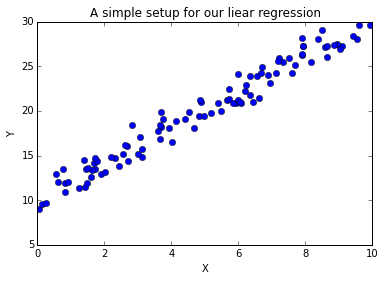

In [381]:
## Lets plot the data
import matplotlib.pyplot as plt
% matplotlib inline

plt.plot(X[:,0],Y,'bo')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('A simple setup for our liear regression')



## Scikit-learn 
is a package for python that has a nice syntax for fitting models, or useing them to predict. 


[ 1.99369056]
10.1654407504


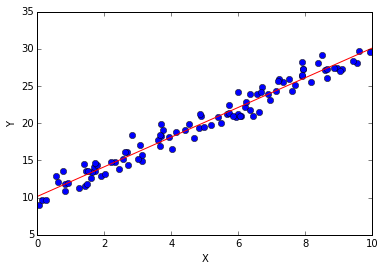

In [382]:
from sklearn.linear_model import LinearRegression
import pylab as pl

model = LinearRegression()
model.fit(X, Y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 10, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X[:,0], Y, 'o')
plt.hold('on')
plt.plot(X_fit, y_fit, 'r-');
plt.xlabel('X')
plt.ylabel('Y')


# We can also print the coefficients. 
print(model.coef_)
print(model.intercept_)

## Many variables can be included in X, they can be of any quantitative or even qualitative type. 

Now let's fit for data simulated to follow this form....

$$Y = 10 + 2X_1 + 3X_2 + 4X_3 + \epsilon$$

In [407]:
## Simulte some data, because we lack two continuous random variables in our dataset. 
X      = np.random.uniform(0, 10, size = (100,3))
alpha  = 10
beta   = [2, 3, 4]
# Make some noise. 
eps = np.random.normal(0,1,100)

# Now we define Y to have a linear relationship with X, plus some noise. 
Y   = alpha + beta[0] * X[:,0] + beta[1] * X[:,1] + beta[2] * X[:,2] + eps

model = LinearRegression()
model.fit(X, Y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 10, 100)
X_fit = np.array([X[:,0], X[:,1], X[:,2]]).transpose()
type(X_fit)
y_fit = model.predict(X_fit)

# We can also print the coefficients. 
print( 'Our three model coefficients are ' + str(model.coef_))
print( 'Our fitted intercept is '+ str(model.intercept_))
print( 'The standard error of our estimates is ' + str( np.sqrt(np.sum(np.square(Y-y_fit)))/100 ))  

Our three model coefficients are [ 1.99277847  2.97555276  3.97372431]
Our fitted intercept is 10.2881243515
The standard error of our estimates is 0.106005488278


<span style="color:red; font-size:1.3em;">
Can you think of one scenario in which linear regression would help answer a research question for this course?
What might confound any relationship you find?
</span>


## Classification (Logistical Regression or SVM)
Logical $Y$, any $X$.

Say that we have a continuous explanatory variables, but would like to predict a discrete variable $Y$. 

For example, given a student's grade in a course, with what probability do we expect that student to choose a major?

One method for completing this task is a **Support Vector Machine** or SVM. 

In this case we are again fitting a line, but we want the line that best separates two sets of data. 

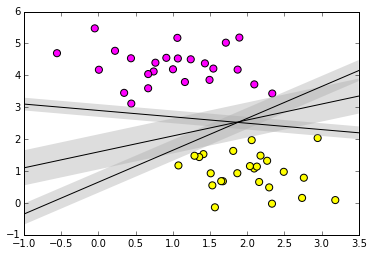

In [408]:
# Again we will invent some data 

from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

# Draw three lines that couple separate the data
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

[[ 0.22967329 -1.37758262]]


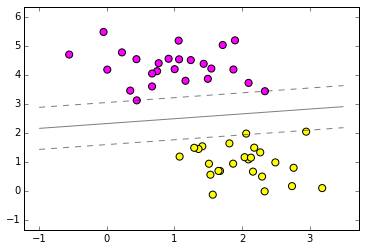

In [415]:
#The code to fit a model using scikitlearn is VERY similar. 
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X, y)


## This is code copied from another tutorial, I'm using it here only as an example 
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
#plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
#            s=200, facecolors='none');

# Clustering (Gaussian mixtures or k-means)
Unobserved, categorical $Y$, any $X$.

We might not be able to directly observe a $Y$ of interest, but could make a compelling argument for it if patterns exist in the data. 

For example, 


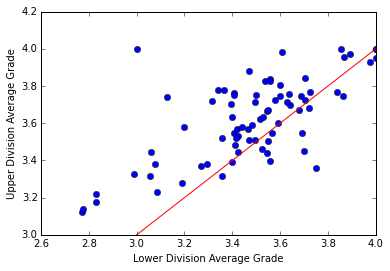

In [527]:
## Let's make a matrix dataset of each department, again looking at lower division and upper division grades. 
grades_binnedmodel = grades_red.groupby(['Subject','Course Level']).agg(np.mean).reset_index()
grades_pivot = grades_binnedmodel.pivot(index='Subject', values='Ave Letter Grade', columns='Course Level')

plt.plot(grades_pivot['Lower Division'], grades_pivot['Upper Division'], 'o')
plt.hold('on')
line = np.linspace(3,4,10)
plt.plot(line,line, 'r-')
plt.xlabel('Lower Division Average Grade')
plt.ylabel('Upper Division Average Grade')


#Principle Components Analysis
Unobserved, continuous $Y$, any $X$. 

## In reality the velocity of the car may not be constant, we can model that with a random error. 

$$
p = vt + p_0 + \epsilon_t
$$